<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_PPGMNE.png" width="700" alt="PPGOLD Data Science: INTRO"  />
</p>

# Data Science 2 - Aula 03

# Lasso Regression
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Usar a Lasso Regression
* Estimar erros para vários valores de $\lambda$

## Bibliotecas

In [100]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np
np.random.seed(7694432)
# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [101]:
# O objeto ainda está vazio. 
caminho = "" 

# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/DS02_PPGOLD/main/Data/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho)

# drop as colunas não numéricas
string_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
            'drive-wheels', 'engine-location','engine-type', 'num-of-cylinders', 'fuel-system']
df_linear_multipla = df.drop(string_cols, axis=1)

In [102]:
lm = LinearRegression()

# Selecionar as variáveis independentes
drop_cols = ["price", 'normalized-losses', "symboling", "highway-mpg", 
             "city-mpg","engine-size","horsepower"]
X = df_linear_multipla.drop(drop_cols, axis = 1)
Y = df_linear_multipla['price']
print("Shape = ",X.shape)

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

# Adicionando XX colunas aleatórias no DF original
for i in range(5):
    col_name = 'Random_' + str(i+1)
    df_linear_multipla[col_name] = np.random.randint(1, 100, size=len(df))
df.head()

# Criando as novas variáveis
X = df_linear_multipla.drop(drop_cols, axis = 1)
Y = df_linear_multipla['price']
print("Shape = ",X.shape)

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

Shape =  (201, 9)
SCORE: 0.7421
Shape =  (201, 14)
SCORE: 0.7468


### Cálculo dos erros

/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.267e+08, tolerance: 6.905e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in

LM
 Mean Squared Error: 32875852.93696949
SCORE: 0.6953
Melhor Alpha R2:  26.262626262626263
Melhor R2      :  0.6983286475507721


/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


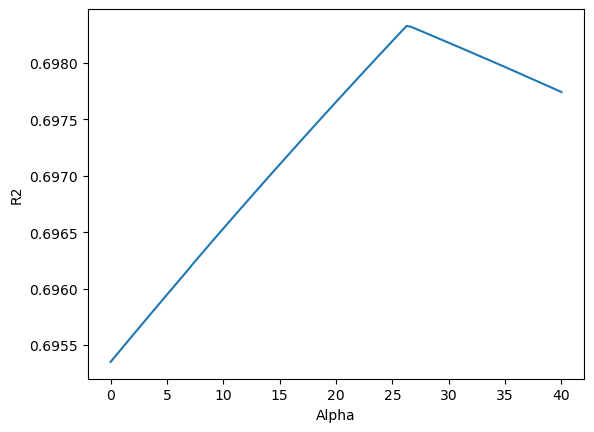

Melhor Alpha MSE:  26.262626262626263
Melhor MSE      :  32554341.218762323


/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


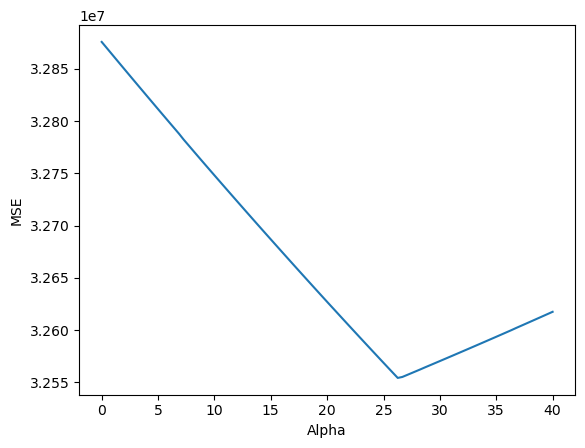

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import numpy as np

X = df_linear_multipla.drop(drop_cols, axis = 1)
Y = df_linear_multipla['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled  = X_test

df_lasso = pd.DataFrame(columns=['Alpha', 'R2', 'MSE'])

intervalo = np.linspace(0,40,100)

# Train a Lasso regression model
R2_best = 0
Alpha_R2 = 0
MSE_best = np.inf
Alpha_MSE = 0
for i in intervalo:
    lasso = Lasso(alpha=i)  # alpha is the regularization strength
    lasso.fit(X_train_scaled, y_train)

    # Exibindo o R^2
    R2=lasso.score(X_test_scaled,y_test)
    #print("SCORE: %.4f" % R2)

    # Predict on the test set
    y_pred_lasso = lasso.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_lasso)
    new_row = [i, R2, mse]
    df_lasso.loc[len(df_lasso)] = new_row
    if R2 > R2_best:
        R2_best = R2
        Alpha_R2 = i
    if mse < MSE_best:
        MSE_best = mse
        Alpha_MSE = i
    
# Train a Linear regression model
lm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lm = lm.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lm)
print("LM\n Mean Squared Error:", mse)
# Exibindo o R^2
R2=lm.score(X_test_scaled,y_test)
print("SCORE: %.4f" % R2)

print("Melhor Alpha R2: ", Alpha_R2)
print("Melhor R2      : ", R2_best)
sns.lineplot(data=df_lasso, x="Alpha", y="R2")
plt.show()

print("Melhor Alpha MSE: ", Alpha_MSE)
print("Melhor MSE      : ", MSE_best)
sns.lineplot(data=df_lasso, x="Alpha", y="MSE")
plt.show()

In [104]:
feature_names = X.columns
intervalo = np.linspace(0,400,100)

for i in intervalo:
    lasso = Lasso(alpha=i)  # alpha is the regularization strength
    lasso.fit(X_train_scaled, y_train)

    # Exibindo o R^2
    R2=lasso.score(X_test_scaled,y_test)
   
    for coef, feature_name in zip(lasso.coef_, feature_names):
        if np.abs(coef) <= 0.005:
            print("\nLasso Regression (Alpha= ", i, " Coefficients  with value 0:")
            print(feature_name)


Lasso Regression (Alpha=  28.282828282828284  Coefficients  with value 0:
bore


/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.267e+08, tolerance: 6.905e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in


Lasso Regression (Alpha=  32.323232323232325  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  36.36363636363637  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  40.40404040404041  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  44.44444444444445  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  48.484848484848484  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  52.525252525252526  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  56.56565656565657  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  60.60606060606061  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  64.64646464646465  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  68.68686868686869  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  72.72727272727273  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  76.76767676767678  Coefficients  with value 0:
bore

Lasso Regression (Alpha=  80.80808080808082  Coe

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 22-04-2024       | 1.0   | Eduardo Pecora    | Estrutura Aula        |